## Daniel Lupercio HW3

### 8. We will now perform cross-validation on a simulated data set.

### (a) Generate a simulated data set as follows

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings

In [2]:
np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
y = x - 2*(x**2) + np.random.normal(loc=0, scale=1, size=100)

### In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

n is the number of observations, where n = 100. p is the number of parameters or variables used, here we are using two parameters.

$$
Y = X-2X^2+ \epsilon
$$

### (b) Create a scatterplot of X against Y. Comment on what you find. 

<AxesSubplot:>

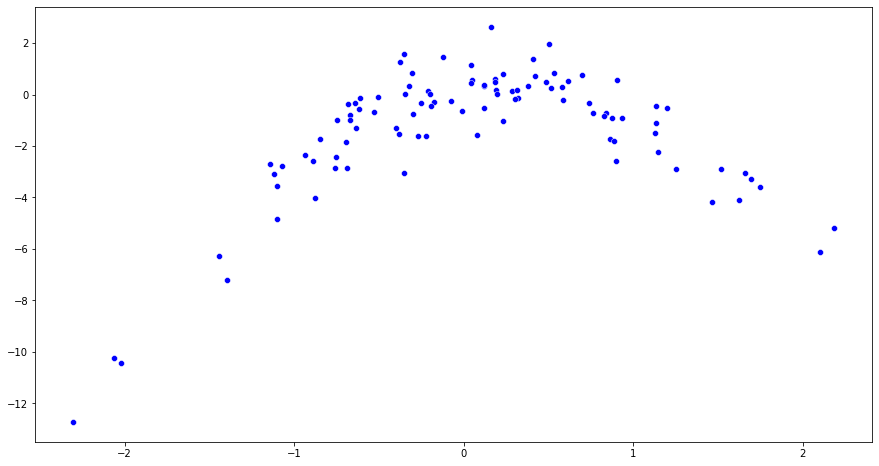

In [3]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=x, y=y, color='b')

We see a negative quadratic function. With most of the data points in the domain of (-1.5, 2.5). This function has a range of (-12,3).

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

$$
i. Y = \beta_0 + \beta_1X + \epsilon \\
ii. Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon \\
iii. Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon \\
iv. Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon
$$

### Note you may find it helpful to use the $data.frame()$ function to create a single data set containing both X and Y. 

In [4]:
import random
from sklearn.linear_model import LinearRegression

def LOOCV(df): #df is defined/redefined for each model
    n = len(df)
    error = 0.0

    for i in range(n):
        test = df.iloc[[i]]
        train = df.drop(df.index[i])

        X_ = train.loc[:, train.columns != 'y'] #each dataframe will have a set number of x columns, and the last y column
        y_ = train['y']

        model = LinearRegression(fit_intercept=True)
        model.fit(X_, y_)

        X_ = test.loc[:, df.columns != 'y']
        predictions = model.predict(X_)
        error += (predictions - test.iloc[0]['y'])**2

    return (error/n)

random.seed(1) 

# Model 1
df = pd.DataFrame({'x':x, 'y':y})
print("MSE for model 1: " +str(LOOCV(df)))

# Model 1
df = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("MSE for model 2: " +str(LOOCV(df)))

# Model 3
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("MSE for model 3: " +str(LOOCV(df)))

# Model 4
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("MSE for model 4: " +str(LOOCV(df)))


MSE for model 1: [6.26076433]
MSE for model 2: [0.91428971]
MSE for model 3: [0.92687688]
MSE for model 4: [0.86691169]


### (d) Repeat c) using another random seed, and report your results. Are your results the same as in part c)? Why?

In [5]:
random.seed(5)
# Model 1
df = pd.DataFrame({'x':x, 'y':y})
print("MSE for model 1: " +str(LOOCV(df)))

# Model 1
df = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("MSE for model 2: " +str(LOOCV(df)))

# Model 3
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("MSE for model 3: " +str(LOOCV(df)))

# Model 4
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("MSE for model 4: " +str(LOOCV(df)))


MSE for model 1: [6.26076433]
MSE for model 2: [0.91428971]
MSE for model 3: [0.92687688]
MSE for model 4: [0.86691169]


Yes, the results are the same as in part c). It apppears that the different random seed had no effect on the results. 

### (e) Which of the models in c) had the smallest LOOCV error? Is this what you expected? Explain your answer?

Model 4 has the lowest LOOCV error. I did not expect this, the relationship between x and y is a fourth degree polynomial. Interpreting this model is complex as is. 

### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [8]:
warnings.filterwarnings('ignore')
#begin by using the model that has all the variables
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})

X_ = df.loc[:, df.columns != 'y']
X_ = sm.add_constant(X_, prepend=True)
y_ = df['y']

model = sm.OLS(y_, X_)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.24e-41
Time:                        16:19:26   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3140      0.136      2.311      0.0

Using the fourth model, we are able to see that the cubic term, is statistically insignificant.